### Analyzing the Stroop Effect


### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

#### (1) What is the independent variable? What is the dependent variable?

$\\\qquad$ The independent variable is the variable that is not impacted by the other variables in the experiment. In our experiment, **CONGRUENCY** is the independent variable. This is the variable that we will modify to measure the change in outcome.

The dependent variable is the variable that we would like to measure in the experiment. In our case, **RESPONSE TIME** is the dependent variable that we are measuring in the experiment.

#### (2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$\\\qquad$ We are measuring the **RESPONSE TIME** for individual participant between *congruent* and *incongruent* inputs. Let the population mean time taken for response be $\mu$. For *congruent* input, the population mean response time is $\mu_c$ and for *incongruent* input the population mean response time is $\mu_i$.

Then our NULL and ALTERNATIVE hypothesis will be

H0: $\mu_c$ - $\mu_i$ = 0

H1: $\mu_c$ - $\mu_i$ $\neq$ 0

#### (3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# plot inline
% matplotlib inline

In [2]:
# read CSV file
df = pd.read_csv('stroopdata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [3]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


From the above we can identify the following:$\\$
$\\$ **Observations on Measures of centre:**

\begin{enumerate}
\item Mean Response Time when words and colors are congruent: \textbf{14.051125}
\item Mean Response Time when words and colors are not congruent: \textbf{22.015917}
\item Median Response Time when words and colors are congruent: \textbf{14.356500}
\item Median Response Time when words and colors are not congruent: \textbf{21.017500}
\end{enumerate}

In [5]:
# Calculate Range
df.max() - df.min()

Congruent      13.698
Incongruent    19.568
dtype: float64

In [6]:
# Calculate IQR
df.quantile(0.75) - df.quantile(0.25)

Congruent      4.30550
Incongruent    5.33475
dtype: float64

$\\$ **Observations on Measures of spread:**

\begin{enumerate}
\item Minimum Response Time for Congruent words: \textbf{8.630000}
\item Minimum Response Time for Incongruent words: \textbf{15.687000}
\item Maximum Response Time for Congruent words: \textbf{22.328000}
\item Maximum Response Time for Incongruent words: \textbf{35.255000}
\item Range for Congruent words: \textbf{13.698}
\item Range for Incongruent words: \textbf{19.568}
\item IQR for Congruent words: \textbf{4.30550}
\item IQR for Incongruent words: \textbf{5.33475}
\end{enumerate}

#### (4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

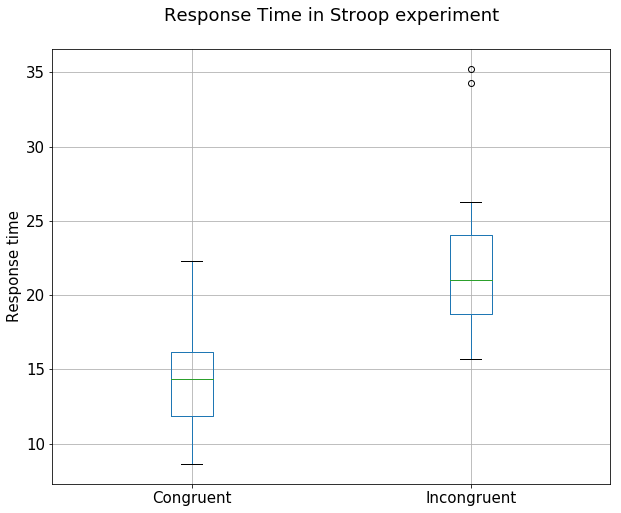

In [7]:
# plot boxplot
fig = df.boxplot(figsize=(10,8),fontsize=15);

# set title & label
plt.title('Response Time in Stroop experiment',fontsize=18);
plt.ylabel('Response time',fontsize=15);

# add space between title & plot
ttl = fig.title;
ttl.set_position([.5, 1.05]);

We can observe:


\begin{itemize}
\item The mean and range of both Congruent and Incongruent are different as we saw earlier in data.
\item The data is a bit skewed in both Congruent and Incongruent results
\item Incongruent results are more spread out than Congruent results
\item There are 2 outliers in response time for Incongruent inputs
\end{itemize}

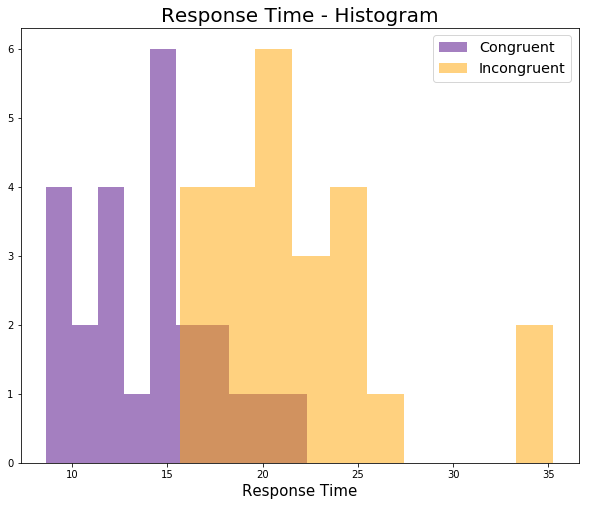

In [8]:
# set plot size
plt.subplots(figsize=(10,8));

# plot histogram
plt.hist(df.Congruent,alpha=0.5,color='indigo');
plt.hist(df.Incongruent,alpha=0.5,color='orange');

# set title, label & legend
plt.title('Response Time - Histogram',fontsize=20);
plt.xlabel('Response Time',fontsize=15);
plt.legend(['Congruent','Incongruent'],loc='upper right',fontsize='x-large');

Histogram proves our earlier observations. Ignoring the outliers, we can see that the data is normally distributed around the mean with some skew, for both Congruent and Incongruent inputs.

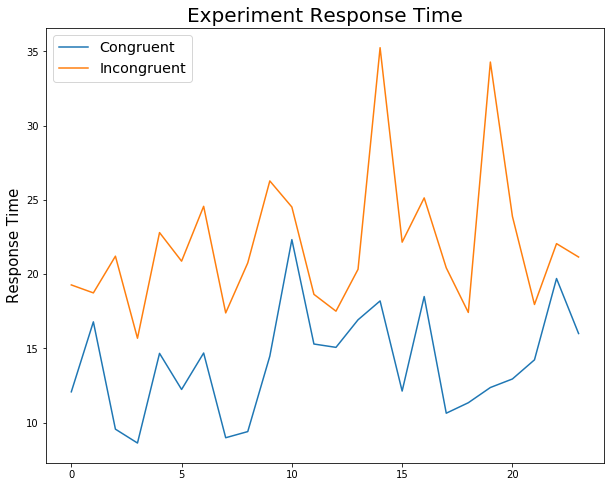

In [9]:
# set plot size
plt.subplots(figsize=(10,8));

# plot line plot
plt.plot(df);

# set title, label & legend
plt.title('Experiment Response Time',fontsize=20);
plt.ylabel('Response Time',fontsize=15);
plt.legend(['Congruent','Incongruent'],loc='upper left',fontsize='x-large');

Although the points are unrelated, the line plot provides an overall view of how congruent and incongruent response time values are. One can observe that the response time for Incongruent inputs are always higher than the response time for Congruent inputs

#### (5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations?

$\\$ Our observation contains the outcome of the experiment conducted on the same individual with different inputs. We will perform Paired T-test with our data since this will test significant difference between 2 related variables. We will perform this test for **95% confidence** level or **$\alpha$ = 0.05**

In order to perform Paired T-test, the following conditions must be met$\\$
\begin{enumerate}
\item Dependent variable must be continuous
\item Dependent variable must be approximately normally distributed
\item Dependent variable must not contain outliers
\end{enumerate}

In the above conditions, we know$\\$
\begin{enumerate}
\item Response Time(DV) is continuous
\item Response Time(DV) is approximately normally distributed
\end{enumerate}

But we also identified that Response Time has outliers from our boxplot. We need to make sure by analyzing data.

#### Normality:
The Q-Q plot is used to identify the distribution of data. If all our data points are on the red line, then the data is normally distibuted.

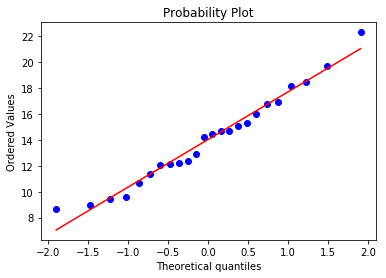

In [10]:
stats.probplot(df.Congruent,plot=plt);

We can see that there are data points that are not in the line. This denotes skew in the data which we already observed from our plots

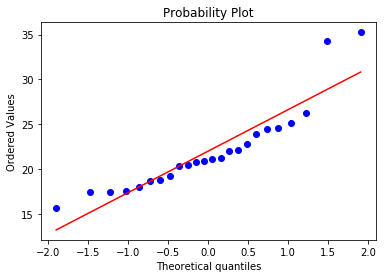

In [11]:
stats.probplot(df.Incongruent,plot=plt);

The response time for Incongruent data is more skewed than the Congruent response time as observed from above plot.

#### Outliers:
Let's also identify outliers in our data. To do this there are many methods. We will use IQR.

In [12]:
# get 1st Quartile
Q1 = df.quantile(0.25)
Q1

Congruent      11.89525
Incongruent    18.71675
Name: 0.25, dtype: float64

In [13]:
# get 3rd Quartile
Q3 = df.quantile(0.75)
Q3

Congruent      16.20075
Incongruent    24.05150
Name: 0.75, dtype: float64

In [14]:
# get Inter Quartile Range
IQR = Q3-Q1
IQR

Congruent      4.30550
Incongruent    5.33475
dtype: float64

In [15]:
# get values that lie outside the IQ range for Congruent input
df[(df.Congruent < (Q1[0]-1.5*IQR[0])) | (df.Congruent > (Q3[0]+1.5*IQR[0]))]

,Congruent,Incongruent


There are no outliers in data for Congruent input

In [16]:
# get values that lie outside the IQ range for Incongruent input
df[(df.Incongruent < (Q1[1]-1.5*IQR[1])) | (df.Incongruent > (Q3[1]+1.5*IQR[1]))]

,Congruent,Incongruent
14,18.200,35.255
19,12.369,34.288


We have 2 outliers in data for Incongruent input as we observed from our boxplot earlier. Our analysis proves it. Since 2 tailed t-test for dependent means is robust for violations in normal distribution, we will continue using the outliers in our analysis.

#### Paired T-test:
We will perform Paired T-test in the dataset now.

In [17]:
df['Difference'] = df.Incongruent - df.Congruent

In [18]:
diff_mean = df.Difference.mean()
diff_mean

7.9647916666666658

In [19]:
df['Deviation'] = (df.Difference - diff_mean)**2

In [20]:
deg_fre = 23
std_dev = np.sqrt(df.Deviation.sum()/deg_fre)
std_dev

4.8648269103590556

In [21]:
std_err = std_dev/np.sqrt(24)
std_err

0.99302863477834058

Under the NULL hypothesis, the mean $\mu$=0.

In [22]:
t = diff_mean/std_err
t

8.020706944109957

In [23]:
t_critical = 2.069

In [24]:
print('T value from experiment:',t)
print('T-critical value: ',t_critical)

T value from experiment: 8.02070694411
T-critical value:  2.069


The p-value for the t-value from our experiment at 95% confidence is less than 0.0001 which is statistically extremely significant.

Our t-value is significantly greater than the t-critical value at 95% confidence, we reject the NULL hypothesis

Let us also try the in-build t-test function in scipy.stats

In [25]:
# perform Paired T-test
stats.ttest_rel(df.Congruent,df.Incongruent)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

The test results and manual calculation resulted in the same outcome

In [26]:
# print p-value in decimal
print('{:.16f}'.format(4.1030005857111781e-08))

0.0000000410300059


We can clearly see that the finding is statistically significant. The p-value is less than 0.05 by a huge margin. Hence we reject the NULL Hypothesis.


**Result:**
\begin{enumerate}
\item We reject the NULL Hypothesis. i.e. $\mu_c - \mu_i\neq$ 0
\item Mean Response Time for Incongruent input is greater than Mean Response Time for Congruent input. i.e. $\mu_c \lt \mu_i$ 
\end{enumerate}

#### (6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

$\\$ When we see objects, we process so many information about the object, related to the object and also related to the environment the object is present. We derive meaning from all this data combined.

In Stroop's experiment, the participant or subject on whom the experiment is performed is first shown Congruent words with colors. The results are stored. This comes easy because as humans we are used to reading. It is habitual.

But when words with Incongruent colors are shown and the subject/participant is asked to spell out the color, this goes against the habitual brain function of reading. In this case, the cognitive processing load to brain is increased because by habit brain reads the words but must process the color of the word which must be spelled out. There is conflict between 2 information sources which must be resolved. This slows the responses which is clearly visible from our data.

Any action/process that requires going against habit or practice will lead to slowed response. Some tasks would be using words other than color like emotional words like 'joy', 'anger'...etc which is done in **'Emotional Stroop effect'** test in psychology. There is also **'Numerical Stroop effect'** where numbers are used instead of words. Also the size of the text play a role in 'Numerical Stroop effect'